In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
#경고창무시?
import warnings
warnings.filterwarnings("ignore")
#TimeSeries분석
from fbprophet import Prophet
from datetime import datetime
import pandas_datareader as pdr

In [23]:
start = datetime(2013, 1, 1) 
end = datetime(2020, 12, 7) 
star = pdr.DataReader('SBUX', data_source='yahoo', start=start, end=end)   
star.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,26.834999,26.195000,26.205000,26.815001,9247000.0,23.403025
2013-01-02,27.500000,27.129999,27.295000,27.500000,13267600.0,24.000858
2013-01-03,27.805000,27.500000,27.535000,27.684999,14670400.0,24.162321
2013-01-04,28.000000,27.655001,27.764999,27.844999,10911400.0,24.301960
2013-01-07,27.895000,27.504999,27.700001,27.860001,8720000.0,24.315062


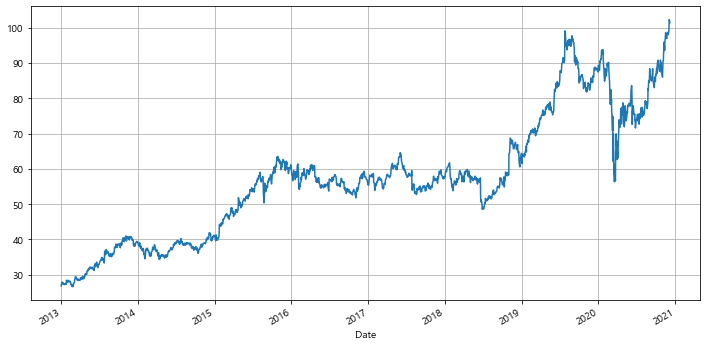

In [24]:
star.Close.plot(figsize=(12,6), grid=True)  #종가데이터로 그래프그리기
plt.show()

In [25]:
star_trunc = star[:'2020-01-01'] # 2020.1월까지의 데이터로 자르기/2020.이후(11개월치; 343일)월예측해서 실제데이터와 비교할예정
star_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,88.599998,88.000000,88.199997,88.519997,1847800.0,86.731209
2019-12-26,88.760002,87.790001,88.730003,88.080002,4177700.0,86.300102
2019-12-27,88.459999,87.690002,88.110001,88.129997,4129300.0,86.349091
2019-12-30,88.199997,87.059998,88.010002,87.440002,4655600.0,85.673035
2019-12-31,87.989998,87.309998,87.440002,87.919998,4115600.0,86.143326


In [26]:
df = pd.DataFrame({'ds': star_trunc.index, 'y': star_trunc.Close})     
df.reset_index(inplace=True)        
del df['Date']    
df.head()

,ds,y
0,2012-12-31,26.815001
1,2013-01-02,27.500000
2,2013-01-03,27.684999
3,2013-01-04,27.844999
4,2013-01-07,27.860001


In [27]:
model = Prophet(daily_seasonality=True)   
model.fit(df)  

In [28]:
future = model.make_future_dataframe(periods=365) 
future.tail()

,ds
2123,2020-12-26
2124,2020-12-27
2125,2020-12-28
2126,2020-12-29
2127,2020-12-30


In [29]:
forecast = model.predict(future)

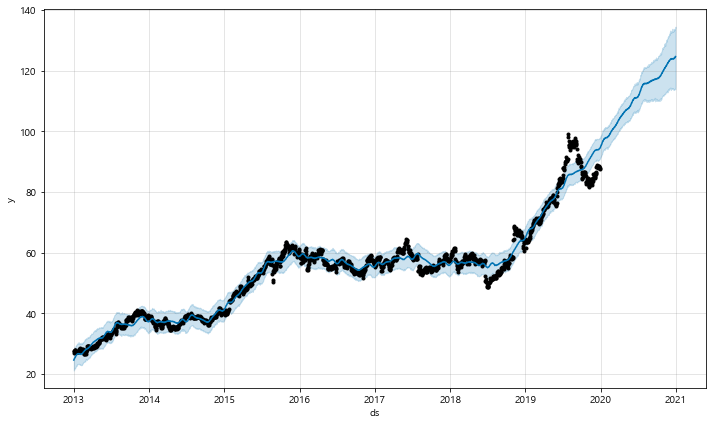

In [30]:
model.plot(forecast);

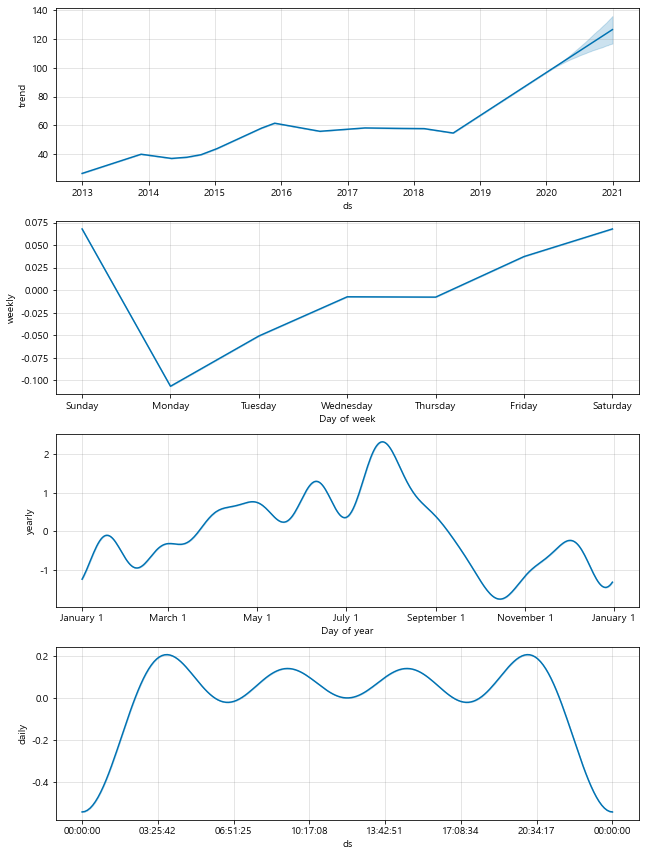

In [31]:
model.plot_components(forecast); 

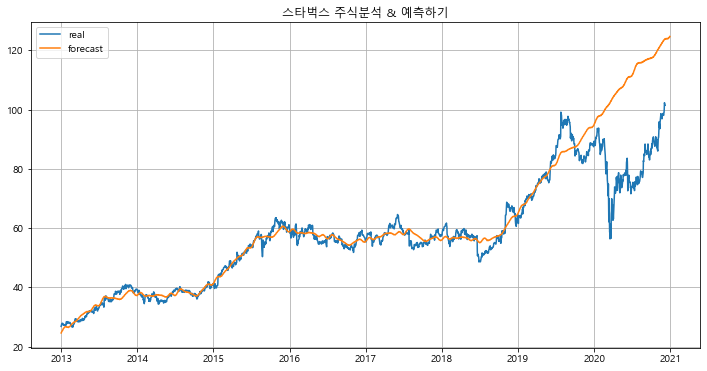

In [32]:
plt.figure(figsize=(12,6))
plt.plot(star.index, star.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.title('스타벅스 주식분석 & 예측하기')
plt.grid()
plt.legend()
plt.show()

## 향후1년 주식 전망보기

In [34]:
n_star = pd.DataFrame({'ds':star.index, 'y':star.Close})
n_star.reset_index(inplace=True)
del n_star['Date']
n_star.head()

,ds,y
0,2012-12-31,26.815001
1,2013-01-02,27.500000
2,2013-01-03,27.684999
3,2013-01-04,27.844999
4,2013-01-07,27.860001


In [35]:
n_model = Prophet(daily_seasonality=True)
n_model.fit(n_star)

In [39]:
n_future = n_model.make_future_dataframe(periods=365)
n_future.tail()

,ds
2359,2021-12-03
2360,2021-12-04
2361,2021-12-05
2362,2021-12-06
2363,2021-12-07


In [40]:
n_forecast = n_model.predict(n_future)

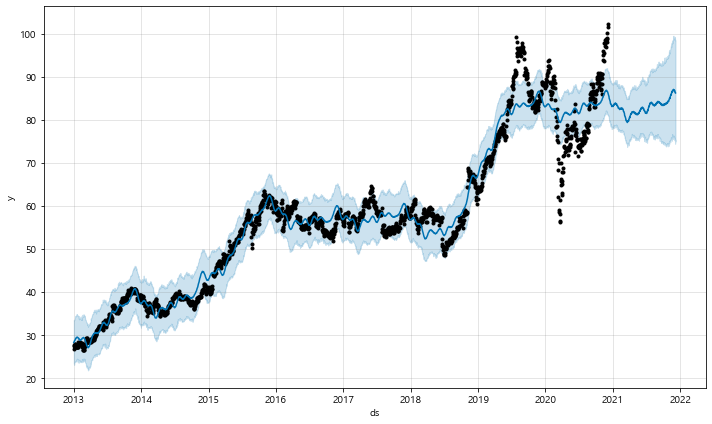

In [41]:
n_model.plot(n_forecast);

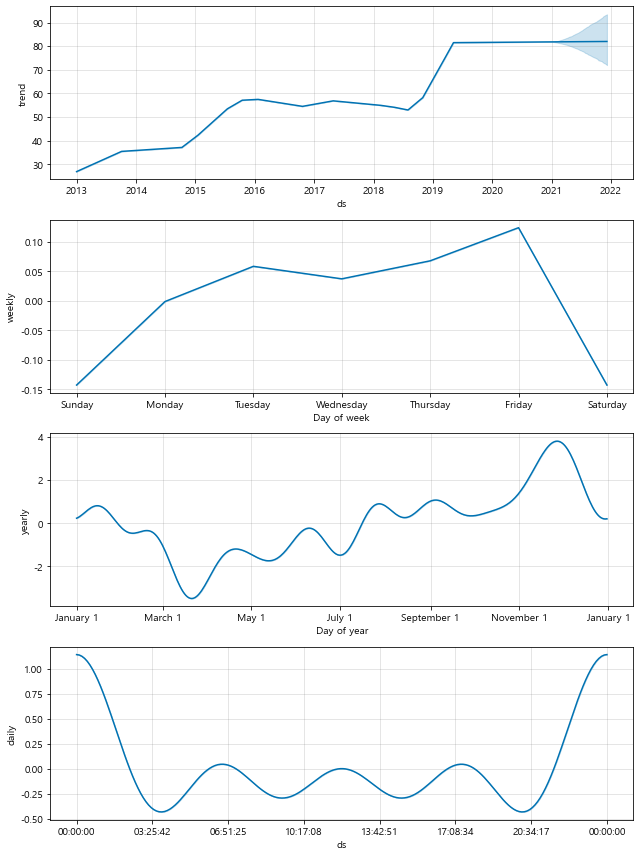

In [42]:
n_model.plot_components(n_forecast);